# Ontologies and text mining

> Overview:

*   Exact match with a dictionary
*   Word2Vec





In this tutorial, you will learn how text embeddings can be generated and used to facilitate learning from text.





In [1]:
!pip install gensim==4.0.0
!pip install scikit-learn
import matplotlib.pyplot as plt
from google.colab import drive
import gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gensim-4.0.0-cp38-cp38-manylinux1_x86_64.whl (23.9 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.0
    Uninstalling gensim-4.3.0:
      Successfully uninstalled gensim-4.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
gensim.__version__

'4.0.0'

We created a dictionary our `Family Ontology` 

In [3]:
dictionary={'father': 'http://Father', 'female': 'http://Female', 'male': 'http://Male', 'mother': 'http://Mother', 'parent': 'http://Parent', 'person': 'http://Person'}

Let us look at the following text:


**Can we identify that "parent" and "mother" are both an instance of the class "http://Parent"?**

In [4]:
text="Sarah's only parent was her mother"

Using a dictionary, let us first split the text into words. We do that by using the space as a delimiter. We next look up each word in our dictionary.


In [5]:
tokens = text.split(' ')
print('The splitted text looks as follows: ', tokens)
for i,token in enumerate(tokens):
  if token in dictionary:
    print('Identified mention of a class: ',token, 'which is the',i+1,'th token, is an instance of:', dictionary[token])

The splitted text looks as follows:  ["Sarah's", 'only', 'parent', 'was', 'her', 'mother']
Identified mention of a class:  parent which is the 3 th token, is an instance of: http://Parent
Identified mention of a class:  mother which is the 6 th token, is an instance of: http://Mother


We can only detect 'mother' which is an exact match to what we have in the dictionary.
Let us try Word2Vec embeddings which were trained on a large corpus:




In [6]:
drive.mount('/content/drive')
print(gensim.__version__)
model=gensim.models.Word2Vec.load('/content/drive/MyDrive/w2v_model/wv_model')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
4.0.0


We can visualize the embeddings of the ontology classes that we have:

---



---



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


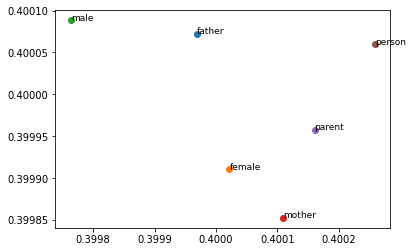

In [9]:
 from sklearn.manifold import TSNE
 import pandas as pd
 embeddings=[]
 classes=[]
 for class_ in dictionary:
   classes.append(class_)
   embeddings.append(model.wv[class_])
tsne_vectors = TSNE(early_exaggeration=1 ,random_state=6,init='random').fit_transform(embeddings)
for i,class_ in enumerate(classes):
  plt.scatter(tsne_vectors[i,0]+0.4,tsne_vectors[i,1]+0.4)
  plt.text(tsne_vectors[i,0]+0.4, tsne_vectors[i,1]+0.4, class_, fontsize=9)

# Application on Gene-Disease association
We can train Word2Vec to generate emebddings for any entity of interest.

For example for the following sentence:

In [10]:
sentence='It was found that familial dysalbuminemic hyperthyroxinemia is spreading rapidly.'

There is a mention of a disease:
OMIM_615999 of the name **familial dysalbuminemic hyperthyroxinemia**.
To that end, we can replace the entire mention with the disease ID

In [12]:
sentence=sentence.replace('familial dysalbuminemic hyperthyroxinemia','OMIM_615999')
print(sentence)

It was found that OMIM_615999 is spreading rapidly.


We can then update our previous Word2Vec model as follows:

In [13]:
model.build_vocab([sentence.split()], update=True)
model.train([sentence.split()],total_examples=model.corpus_count+1,epochs=5)

(17, 40)

For computational purposes, we have already trained the provided Word2Vec model with such sentences. We will use it now to show how we can infer relations about two entities according to their similarities. We have associated Genes and Diseases for which we will show their similarity.

---
The numerical IDs correspond to genes, and IDs starting with 'OMIM' correspond to genes. Entities of the same color are associated.


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


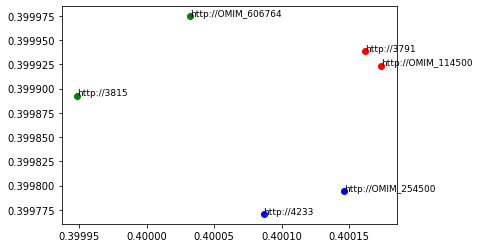

In [36]:
labels, embeddings=[],[]
genes=['http://3791','http://3815','http://4233']
diseases=[ 'http://OMIM_114500','http://OMIM_606764','http://OMIM_254500']
for entity in genes+diseases:
   labels.append(entity)
   embeddings.append(model.wv[entity])
tsne_vectors = TSNE(early_exaggeration=1 ,random_state=1,init='random').fit_transform(embeddings)
colors=['r','g','b','r','g','b']
for i,clr in enumerate(colors):
  plt.scatter(tsne_vectors[i,0]+0.4,tsne_vectors[i,1]+0.4,color=clr)
  plt.text(tsne_vectors[i,0]+0.4, tsne_vectors[i,1]+0.4, labels[i], fontsize=9)